<a href="https://www.kaggle.com/code/msaadiiii/sentimentanalysis?scriptVersionId=217901855" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np


# **Loading the DataSet**

In [2]:
data = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")


In [3]:
data.shape

(50000, 2)

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [6]:
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


<ipython-input-6-c1a779bd745a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [7]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

# Visulaizing the Data Distribution

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# sns.countplot(data['sentiment'])
# plt.title("Distribution of Sentiment Classes")
# plt.xlabel("Sentiment")
# plt.ylabel("Count")
# plt.show()

# **Data PreProcessing**

In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
import nltk
import re



In [11]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
ps = PorterStemmer()
corpus = []

In [13]:
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['review'][i])  # Remove special characters
    review = review.lower()  # Convert to lowercase
    review = review.split()  # Split into words
    
    # Stemming and stopword removal
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)  # Join words back into a sentence
    corpus.append(review)

**One hot Encoding and Stop words**

In [14]:
voc_size = 5000  
onehot_repr = [one_hot(words, voc_size) for words in corpus]

In [15]:
sent_length = 200 
embedded_docs = pad_sequences(onehot_repr, padding='post', maxlen=sent_length)


In [16]:
Y = np.array(data['sentiment'])

# **Train Test Split**

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(embedded_docs, Y, test_size=0.2, random_state=42)


# **Building the model**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM


In [20]:
model = Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=128, input_length=sent_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# **Compiling the Model**

In [22]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


# **Training the Model**

In [23]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 138s 260ms/step - accuracy: 0.5125 - loss: 0.6936 - val_accuracy: 0.5361 - val_loss: 0.6797
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 127s 255ms/step - accuracy: 0.5443 - loss: 0.6655 - val_accuracy: 0.5285 - val_loss: 0.6828
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 257ms/step - accuracy: 0.5709 - loss: 0.6371 - val_accuracy: 0.7765 - val_loss: 0.5223
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 128s 255ms/step - accuracy: 0.7850 - loss: 0.4982 - val_accuracy: 0.8309 - val_loss: 0.4195
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 126s 251ms/step - accuracy: 0.8565 - loss: 0.3618 - val_accuracy: 0.8331 - val_loss: 0.3983


In [24]:
#Evaluating the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.8392 - loss: 0.3877
Test Loss: 0.380055695772171
Test Accuracy: 0.8453999757766724


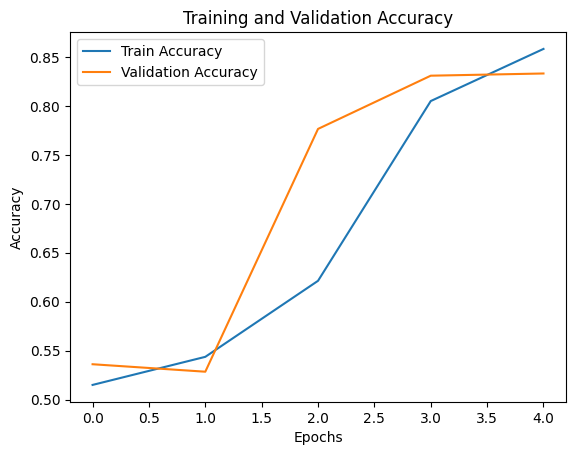

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
def predict_sentiment(review):
    # Preprocess the review
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)

    # One-hot encoding and padding
    onehot_repr = [one_hot(review, voc_size)]
    embedded_doc = pad_sequences(onehot_repr, padding='post', maxlen=sent_length)

    # Predict sentiment
    prediction = model.predict(embedded_doc)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment

In [27]:
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
The sentiment of the review is: positive
